# activations

> Deeper understanding of activations in MLP

In [2]:
#| default_exp makemore.activations

In [3]:
#| hide
from nbdev.showdoc import *

In [4]:
#| export
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from minion.makemore.bigram import stoi, itos
from minion.makemore.mlp import build_XY, Model, plot_embeddings, train, gen_word_nn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [5]:
%matplotlib inline

## Motivations

- We want to move to more complex neural networks like RNN, GRU, LSTM and transformers
- Before doing that better to gain deeper understanding of activations and back propogation and their historical context.
- While RNN very expressive - universal function approximator algorithms; they are not very easily optimizable from the first order techniques available to us and that we use all the time.
- Key to understanding why they don't optimize easily ; is to understand activations and gradient and how they behave during training. Lot of variance in NN architectures that we see are owing to this fact and innovations are around how they have tried to rectify these situation.

In [6]:
words = open("../data/names.txt", 'r').read().split(); words[:5]
words[:8], len(words)

(['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia'],
 32033)

In [7]:
s2i = stoi(words, start_str=".", end_str=".")
i2s = itos(s2i)
display(s2i)
display(i2s)

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [8]:
X, Y = build_XY(words, s2i, block_size=3, verbose=False)
display(X.shape, Y.shape)

n1 = int(0.8*len(X))
n2 = int(0.9*len(X))

Xtr, Ytr = X[:n1], Y[:n1]
Xdev, Ydev = X[n1:n2], Y[n1:n2]
Xte, Yte = X[n2:], Y[n2:]


display(Xtr.shape, Xdev.shape, Xte.shape)

torch.Size([228146, 3])

torch.Size([228146])

torch.Size([182516, 3])

torch.Size([22815, 3])

torch.Size([22815, 3])

/opt/homebrew/Caskroom/miniforge/base/envs/aiking/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(tensor(23.8936, grad_fn=<NllLossBackward0>), 11897, 200)

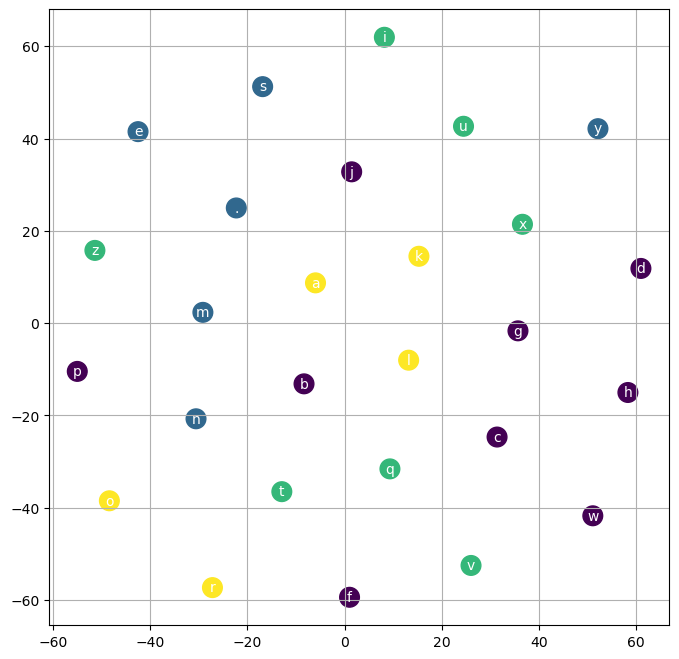

In [136]:
vocab_sz = len(i2s); vocab_sz
model = Model(vocab_sz, emb_sz=10, hidden_units=200)
plot_embeddings(model, s2i, emb_model = TSNE(random_state=0, n_iter=1000, perplexity=26), cluster_model=KMeans(n_clusters=4) ); F.cross_entropy(model(X), Y) , model.num_params(), model.hidden_units

In [11]:
def weight_decay_scheduler(lrs=[0.1, 0.01], epochs=5):
    for i in range(epochs):
        if i <= epochs/2:
            yield torch.tensor(lrs[0])
        else:
            yield torch.tensor(lrs[1])

epochs = 200000
# epochs/2

for lr in weight_decay_scheduler():
    print(lr)

tensor(0.1000)
tensor(0.1000)
tensor(0.1000)
tensor(0.0100)
tensor(0.0100)


In [138]:
tracker = {'lr':[], 'batch_sz':[], 'loss':[], 'block_sz':[], 'emb_sz':[], 'hidden_units':[] }

In [139]:
train?

Signature:
train(
    model,
    X,
    Y,
    lr=0.1,
    epochs=1000,
    verbose=False,
    batch_sz=None,
    loss_fn=<function cross_entropy at 0x13f12d310>,
    tracker=None,
)
Docstring: <no docstring>
File:      ~/rahuketu/programming/minion/minion/makemore/mlp.py
Type:      function

In [140]:
train(model, Xtr, Ytr, lr = weight_decay_scheduler(epochs=200000),epochs=200000, batch_sz=32, tracker=tracker, verbose=True)

0 tensor(23.1901, grad_fn=<NllLossBackward0>)
100 tensor(9.0815, grad_fn=<NllLossBackward0>)
200 tensor(5.8802, grad_fn=<NllLossBackward0>)
300 tensor(5.1096, grad_fn=<NllLossBackward0>)
400 tensor(7.2417, grad_fn=<NllLossBackward0>)
500 tensor(4.6860, grad_fn=<NllLossBackward0>)
600 tensor(7.2835, grad_fn=<NllLossBackward0>)
700 tensor(5.3226, grad_fn=<NllLossBackward0>)
800 tensor(3.7588, grad_fn=<NllLossBackward0>)
900 tensor(3.3159, grad_fn=<NllLossBackward0>)
1000 tensor(3.9826, grad_fn=<NllLossBackward0>)
1100 tensor(4.1025, grad_fn=<NllLossBackward0>)
1200 tensor(3.7784, grad_fn=<NllLossBackward0>)
1300 tensor(2.9515, grad_fn=<NllLossBackward0>)
1400 tensor(3.4218, grad_fn=<NllLossBackward0>)
1500 tensor(3.2354, grad_fn=<NllLossBackward0>)
1600 tensor(3.3846, grad_fn=<NllLossBackward0>)
1700 tensor(3.7046, grad_fn=<NllLossBackward0>)
1800 tensor(3.9429, grad_fn=<NllLossBackward0>)
1900 tensor(2.6885, grad_fn=<NllLossBackward0>)
2000 tensor(2.7092, grad_fn=<NllLossBackward0>)
210

In [141]:
train(model, Xtr, Ytr, lr = 0.01,epochs=2000, batch_sz=32, tracker=tracker, verbose=True)

0 tensor(1.7506, grad_fn=<NllLossBackward0>)
100 tensor(2.1854, grad_fn=<NllLossBackward0>)
200 tensor(2.0619, grad_fn=<NllLossBackward0>)
300 tensor(1.9894, grad_fn=<NllLossBackward0>)
400 tensor(2.4191, grad_fn=<NllLossBackward0>)
500 tensor(2.1392, grad_fn=<NllLossBackward0>)
600 tensor(1.7000, grad_fn=<NllLossBackward0>)
700 tensor(1.9909, grad_fn=<NllLossBackward0>)
800 tensor(1.7664, grad_fn=<NllLossBackward0>)
900 tensor(2.4764, grad_fn=<NllLossBackward0>)
1000 tensor(2.1658, grad_fn=<NllLossBackward0>)
1100 tensor(2.2411, grad_fn=<NllLossBackward0>)
1200 tensor(1.7980, grad_fn=<NllLossBackward0>)
1300 tensor(1.6242, grad_fn=<NllLossBackward0>)
1400 tensor(2.4609, grad_fn=<NllLossBackward0>)
1500 tensor(2.4231, grad_fn=<NllLossBackward0>)
1600 tensor(2.0172, grad_fn=<NllLossBackward0>)
1700 tensor(2.1574, grad_fn=<NllLossBackward0>)
1800 tensor(1.9371, grad_fn=<NllLossBackward0>)
1900 tensor(2.0047, grad_fn=<NllLossBackward0>)
1999 tensor(2.0442, grad_fn=<NllLossBackward0>)


In [16]:
@torch.no_grad()
def split_loss(split, model):
    x, y = {
        'train': (Xtr, Ytr),
        'val': (Xdev, Ydev),
        'test': (Xte, Yte)
    }[split]
    loss = F.cross_entropy(model(x), y)
    # print(x.shape, y.shape)
    print(split, loss.item())


In [ ]:

split_loss('train', model)
split_loss('val', model)

In [24]:
gen_word_nn(model, i2s, n_samples=20,  g=torch.Generator().manual_seed(2147483647+10))

['carmah',
 'ambrileigh',
 'miliathtyn',
 'kanden',
 'jazonen',
 'amerynci',
 'geni',
 'nellara',
 'chaiiv',
 'kaleigh',
 'ham',
 'poru',
 'quinn',
 'suline',
 'livani',
 'wavero',
 'dearisi',
 'jaxeenissa',
 'mel',
 'edi']

## Issues with the NN

- Error at initialization too high. We have a rough idea/ estimate of loss at the time of initialization for Neural Net ( almost always during training)
- 27 characters that can come next at the time of initialization. At initialization we have no more probability of one being more true than oth
- Probability at the time of starting should roughly be uniform distribution of character prediction at the time of initial assignment; assigning equal probability of prediction to all the characters

### Initialization issues

In [46]:
## Expected loss
-torch.tensor(1/len(s2i)).log()

tensor(3.2958)

- Presently at the time of initialization, probability distribution are all messed up. Some characters are very confident and some are not confident at all -> Network is very confidently wrong that's what makes it record high loss

In [53]:
vocab_sz = len(i2s); vocab_sz
model = Model(vocab_sz, emb_sz=10, hidden_units=200)
train(model, Xtr, Ytr, lr = 0.1,epochs=1, batch_sz=32, tracker=tracker, verbose=True)

0 tensor(29.8140, grad_fn=<NllLossBackward0>)
0 tensor(29.8140, grad_fn=<NllLossBackward0>)


In [47]:
logits = torch.tensor([0.0, 0.0, 0.0, 0.0]) # Assuming we only have 4 characters only - this is logits coming out of model

probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
probs, loss # Value of loss we expect in 4 characters with uniform distribution [ And we get it wrong]

(tensor([0.2500, 0.2500, 0.2500, 0.2500]), tensor(1.3863))

In [48]:
logits = torch.tensor([0.0, 0.0, 5.0, 0.0]) # if we are lucky

probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
probs, loss #  Here we luck out and record very low loss - prediction 2 and logits for idx 2 is 5.0 --very high

(tensor([0.0066, 0.0066, 0.9802, 0.0066]), tensor(0.0200))

In [49]:
logits = torch.tensor([0.0,  5.0, 0.0,  0.0]) # more likely we have high loss elsewhere

probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
probs, loss # More likely we record very high numbers for some other character--> We end up having high loss.

(tensor([0.0066, 0.9802, 0.0066, 0.0066]), tensor(5.0200))

In [50]:
logits = torch.tensor([-3.0,  5.0, 0.0,  2.0]) # reality

probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
probs, loss # Logits take on extreme value and record very high loss

(tensor([3.1741e-04, 9.4620e-01, 6.3754e-03, 4.7108e-02]), tensor(5.0553))

In [58]:
logits = torch.randn(4)
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
logits, probs, loss # Logits are near zero so loss is ok

(tensor([ 1.7157,  0.5247, -1.7278, -0.3324]),
 tensor([0.6827, 0.2075, 0.0218, 0.0880]),
 tensor(3.8252))

In [59]:
logits = torch.randn(4)*10 # if logits are large
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
logits, probs, loss # loss is extremely high

(tensor([ -1.0294,  -7.6559, -16.4280,  -0.8028]),
 tensor([4.4334e-01, 5.8730e-04, 9.1027e-08, 5.5607e-01]),
 tensor(16.2121))

In [61]:
logits = torch.randn(4)*1000 # if logits are large
probs = torch.softmax(logits, dim=0)
loss = -probs[2].log()
logits, probs, loss # loss is extremely high

(tensor([-1094.7864,   207.8663, -1206.6086,  -563.6341]),
 tensor([0., 1., 0., 0.]),
 tensor(inf))

We want logits to be roughly zeroes / uniform or equal when they initialize.By symmetry we don't want any positive or negative due to symmetry ,so zero is ok

In [62]:
vocab_sz = len(i2s); vocab_sz
model = Model(vocab_sz, emb_sz=10, hidden_units=200)
train(model, Xtr, Ytr, lr = 0.1,epochs=1, batch_sz=32, tracker=tracker, verbose=True)

0 tensor(32.3362, grad_fn=<NllLossBackward0>)
0 tensor(32.3362, grad_fn=<NllLossBackward0>)


In [64]:
model(Xtr)[0]

tensor([ -0.2556,   4.1349,  -3.1335,  -2.1826, -22.7851, -17.8256,  -4.1581,
         16.7866,   0.7429,  10.3350, -13.2072,   2.3202,  -3.6444, -29.4586,
         15.1039,  13.4258,  14.0936,  11.8342, -14.6517,  16.8556, -17.8857,
        -18.0688,  19.3895,  -3.5593,  -1.0698, -13.6522,  -0.7200],
       grad_fn=<SelectBackward0>)

Logits are very high value => They should be closer to zero

In [206]:
class ModelInit(object):
    def __init__(self, vocab_sz, blck_sz=3, emb_sz=2, hidden_units=100, g=torch.Generator().manual_seed(2147483647), mul_W2=1.0, mul_b2=1.0, mul_W1=1.0, mul_b1=1.0) -> None:
        self.C = torch.randn((vocab_sz,emb_sz), generator=g)
        self.W1 = torch.randn((blck_sz*emb_sz, hidden_units), generator=g)*mul_W1
        self.b1 = torch.randn(hidden_units, generator=g)*mul_b1
        self.W2 = torch.randn((hidden_units, vocab_sz), generator=g) * mul_W2
        self.b2 = torch.randn(vocab_sz, generator=g) * mul_b2
        self.blck_sz = blck_sz
        self.emb_sz = emb_sz
        self.hidden_units = hidden_units
        self.emb = None
        self.h = None
        self.hpreact = None
        self._init_grad()


    def _init_grad(self):
        for p in self.parameters(): p.requires_grad = True

    def __call__(self, X):
        self.emb = self.C[X]
        self.hpreact = self.emb.view(self.emb.shape[0], -1)@self.W1 + self.b1
        self.h = torch.tanh(self.hpreact)
        logits = self.h@self.W2 + self.b2 ## logits are calculated here so W2 and b2 must be close to zero
        return logits
    
    def parameters(self):
        return [self.C, self.W1, self.b1, self.W2, self.b2]

    def num_params(self):
        return sum(p.nelement() for p in self.parameters())
    
    def zero_grad(self):
        for p in self.parameters(): 
            # print(p.shape, p.data, p.grad)
            p.grad = None

In [157]:
vocab_sz = len(i2s); vocab_sz
model_init = ModelInit(vocab_sz, emb_sz=10, hidden_units=200, mul_W2=0.1, mul_b2=0.0)
train(model_init, Xtr, Ytr, lr = 0.1, epochs=1, batch_sz=32, tracker=tracker, verbose=True)
logits = model_init(Xtr);logits[0]

0 tensor(4.3019, grad_fn=<NllLossBackward0>)
0 tensor(4.3019, grad_fn=<NllLossBackward0>)


tensor([ 1.0323,  0.4644, -0.1029,  0.4121, -0.9996, -1.0876, -2.0720,  0.3077,
         1.1270, -0.8996, -0.3860,  1.7267,  0.1542, -0.9568,  0.0400,  0.4074,
        -1.3500,  1.0367,  1.2130, -0.9362, -0.8425, -0.2311, -0.3305, -0.4859,
        -1.1374, -0.5085,  0.0350], grad_fn=<SelectBackward0>)

In [158]:
vocab_sz = len(i2s); vocab_sz
model_init = ModelInit(vocab_sz, emb_sz=10, hidden_units=200, mul_W2=0.01, mul_b2=0.0)
train(model_init, Xtr, Ytr, lr = 0.1, epochs=1, batch_sz=32, tracker=tracker, verbose=True)
logits = model_init(Xtr);logits[0]

0 tensor(3.3281, grad_fn=<NllLossBackward0>)
0 tensor(3.3281, grad_fn=<NllLossBackward0>)


tensor([ 0.0419, -0.1708, -0.0358,  0.1095,  0.0694,  0.7315,  0.0889, -0.0692,
        -0.4671,  0.0263,  0.2888,  0.1993, -0.1479, -0.1943,  0.6545,  0.0877,
        -0.2587, -0.3141,  0.3298, -0.0591, -0.2870,  0.4297, -0.3069, -0.0893,
        -0.4319, -0.1038, -0.1493], grad_fn=<SelectBackward0>)

In [159]:
vocab_sz = len(i2s); vocab_sz
model_init = ModelInit(vocab_sz, emb_sz=10, hidden_units=200, mul_W2=0.0, mul_b2=0.0)
train(model_init, Xtr, Ytr, lr = 0.1, epochs=1, batch_sz=32, tracker=tracker, verbose=True)
logits = model_init(Xtr);logits[0]

0 tensor(3.2958, grad_fn=<NllLossBackward0>)
0 tensor(3.2958, grad_fn=<NllLossBackward0>)


tensor([-0.3130, -0.1491, -0.0689,  0.4233, -0.1206, -0.2052, -0.1206, -0.1206,
         0.4233, -0.0325, -0.1206,  0.4233, -0.1503, -0.1976, -0.4449,  0.0290,
        -0.1206,  0.4233, -0.0132,  1.3050, -0.1206, -0.1206, -0.1206, -0.1206,
        -0.1206, -0.1259, -0.1206], grad_fn=<SelectBackward0>)

We don't want to be setting weights to be equal to zero. We want to ensure our loss has some entropy which can be used for symmetry breaking (May be for output it could be fine)

In [160]:
tracker = {'lr':[], 'batch_sz':[], 'loss':[], 'block_sz':[], 'emb_sz':[], 'hidden_units':[] }
vocab_sz = len(i2s); vocab_sz
model_init = ModelInit(vocab_sz, emb_sz=10, hidden_units=200, mul_W2=0.01, mul_b2=0.0)
train(model_init, Xtr, Ytr, lr = 0.1, epochs=100000, batch_sz=32, tracker=tracker, verbose=True)
logits = model_init(Xtr);logits[0]

0 tensor(3.3392, grad_fn=<NllLossBackward0>)
100 tensor(2.5719, grad_fn=<NllLossBackward0>)
200 tensor(2.3635, grad_fn=<NllLossBackward0>)
300 tensor(2.1725, grad_fn=<NllLossBackward0>)
400 tensor(2.4429, grad_fn=<NllLossBackward0>)
500 tensor(2.5962, grad_fn=<NllLossBackward0>)
600 tensor(2.5540, grad_fn=<NllLossBackward0>)
700 tensor(2.4494, grad_fn=<NllLossBackward0>)
800 tensor(2.4602, grad_fn=<NllLossBackward0>)
900 tensor(2.4799, grad_fn=<NllLossBackward0>)
1000 tensor(2.3920, grad_fn=<NllLossBackward0>)
1100 tensor(2.4739, grad_fn=<NllLossBackward0>)
1200 tensor(2.5492, grad_fn=<NllLossBackward0>)
1300 tensor(2.0424, grad_fn=<NllLossBackward0>)
1400 tensor(1.9356, grad_fn=<NllLossBackward0>)
1500 tensor(2.5525, grad_fn=<NllLossBackward0>)
1600 tensor(2.7594, grad_fn=<NllLossBackward0>)
1700 tensor(2.7485, grad_fn=<NllLossBackward0>)
1800 tensor(2.4242, grad_fn=<NllLossBackward0>)
1900 tensor(2.4117, grad_fn=<NllLossBackward0>)
2000 tensor(2.2288, grad_fn=<NllLossBackward0>)
2100

tensor([-3.8623,  1.5053, -0.1822,  0.4767,  0.4117,  1.5927, -0.2226,  0.7383,
        -0.5590, -0.5663,  1.2633,  1.2010,  1.5149,  1.6253,  0.3927, -0.3492,
         0.0226, -2.3850,  0.6161,  2.3872,  0.4261, -2.4462, -0.8572,  0.4106,
        -2.0006, -0.8019, -0.5386], grad_fn=<SelectBackward0>)

In [161]:
split_loss('train', model_init)
split_loss('val', model_init)

train 2.145718574523926
val 2.49676775932312


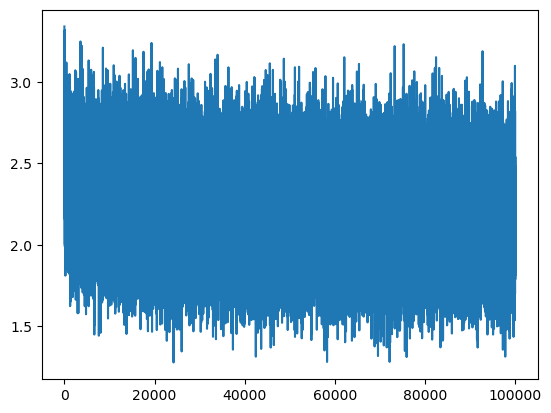

In [162]:
plt.plot(tracker['loss'])

Loss doesn't have the hockey stick behaviour anymore. We took away the unnecessary easy part of the loss function, where weights were just being shrunk down

### Activation Issues (Manually Fixing saturated tanh) 

In [219]:
tracker = {'lr':[], 'batch_sz':[], 'loss':[], 'block_sz':[], 'emb_sz':[], 'hidden_units':[] }
vocab_sz = len(i2s); vocab_sz
model_init = ModelInit(vocab_sz, emb_sz=10, hidden_units=200, mul_W2=0.01, mul_b2=0.0)
train(model_init, Xtr, Ytr, lr = 0.1, epochs=1, batch_sz=32, tracker=tracker, verbose=True)
# logits = model_init(Xtr);logits[0] # Can't run this line if only want to see impact on single minibatch. What should be improved design?

0 tensor(3.3293, grad_fn=<NllLossBackward0>)
0 tensor(3.3293, grad_fn=<NllLossBackward0>)


In [183]:
# plt.hist(model_init.h.data.detach().numpy())
model_init.h.shape

torch.Size([32, 200])

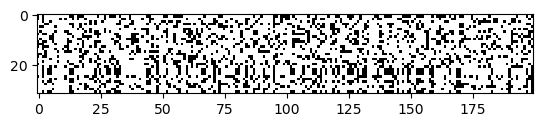

In [202]:
plt.imshow(model_init.h.data.abs() >=0.95, cmap='gray', interpolation='nearest')

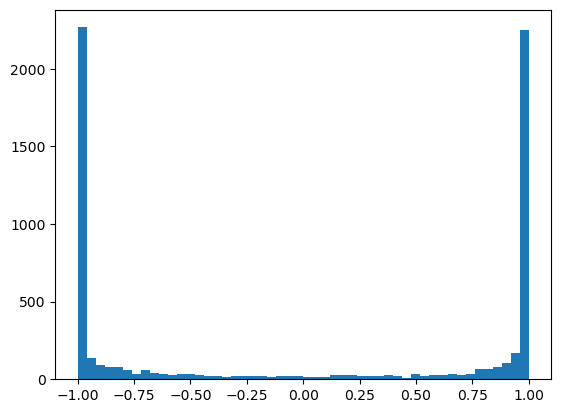

In [198]:
plt.hist(model_init.h.view(-1).data, 50);

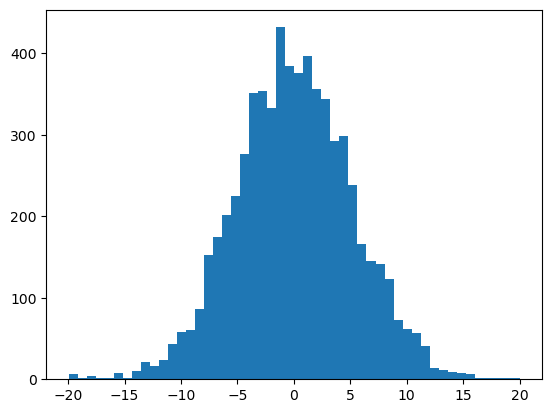

In [199]:
plt.hist(model_init.hpreact.view(-1).data, 50);

Tanh has lot of values at -1 and 1 because hpreact takes a distribution which is very very broad, taking -15 to 15. Tanh being the squashing function have losts of values around -1 and 1 for those extreme values. Why is this a problem?

- During back propogation gradients are flowing backwards. What happens in backward pass for tanh  ?
  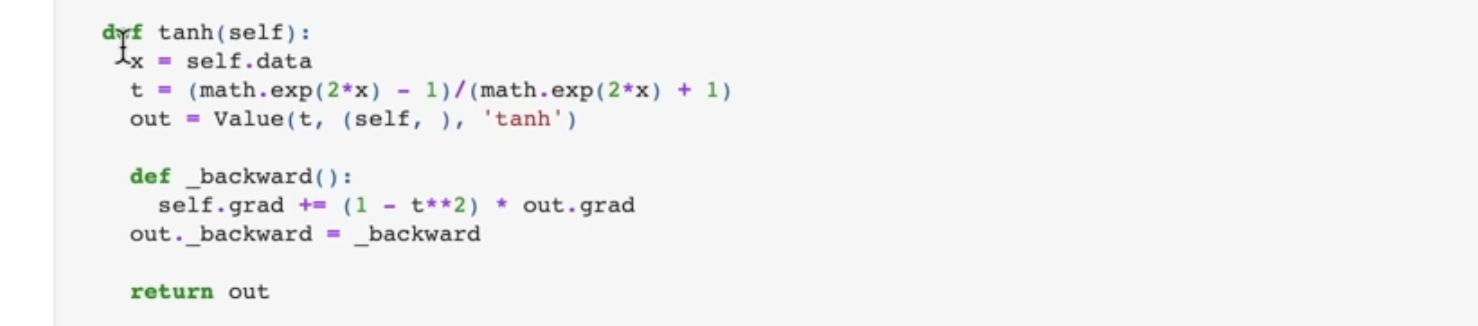

  Based on equation 1-t^2 - gradient becomes zero. ( Intuitively, when we are in the tail of tanh changing values of t won't change tanh a lot. So gradients are zero) => Weights and biases on / around the neuron do n't impact the loss. Neuron stops learning . Gradient flow shuts off. Gradient vanishes

  Similarily if t=0 , gradient just passes through

  Amount of squishing of gradient due to tanh depends on how far u are from the flat tail

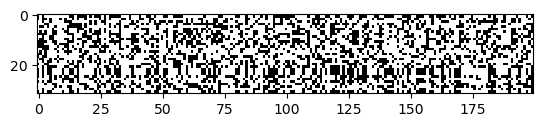

In [205]:
plt.imshow(model_init.h.data.abs() >=0.99, cmap='gray', interpolation='nearest') # All whites are true

- In all white cases backward gradient gets destroyed
- If for anyone of the 200 neurons (x-axis) the entire column is white than we have a dead neuron - we will be in lot of trouble . It means no single example ever activates this neuron in active part of tanh
- Here for all the neurons,  we still have some examples which activates individual neuron in active part of tanh. Some gradient will flow through and neurons will learn
- Lot of other non-linearities / activation functions show similar behaviour ( squeezing/ squashinh neuron once below -sigmoid, tanh, relu, may be elu as well as it has flat parts)
    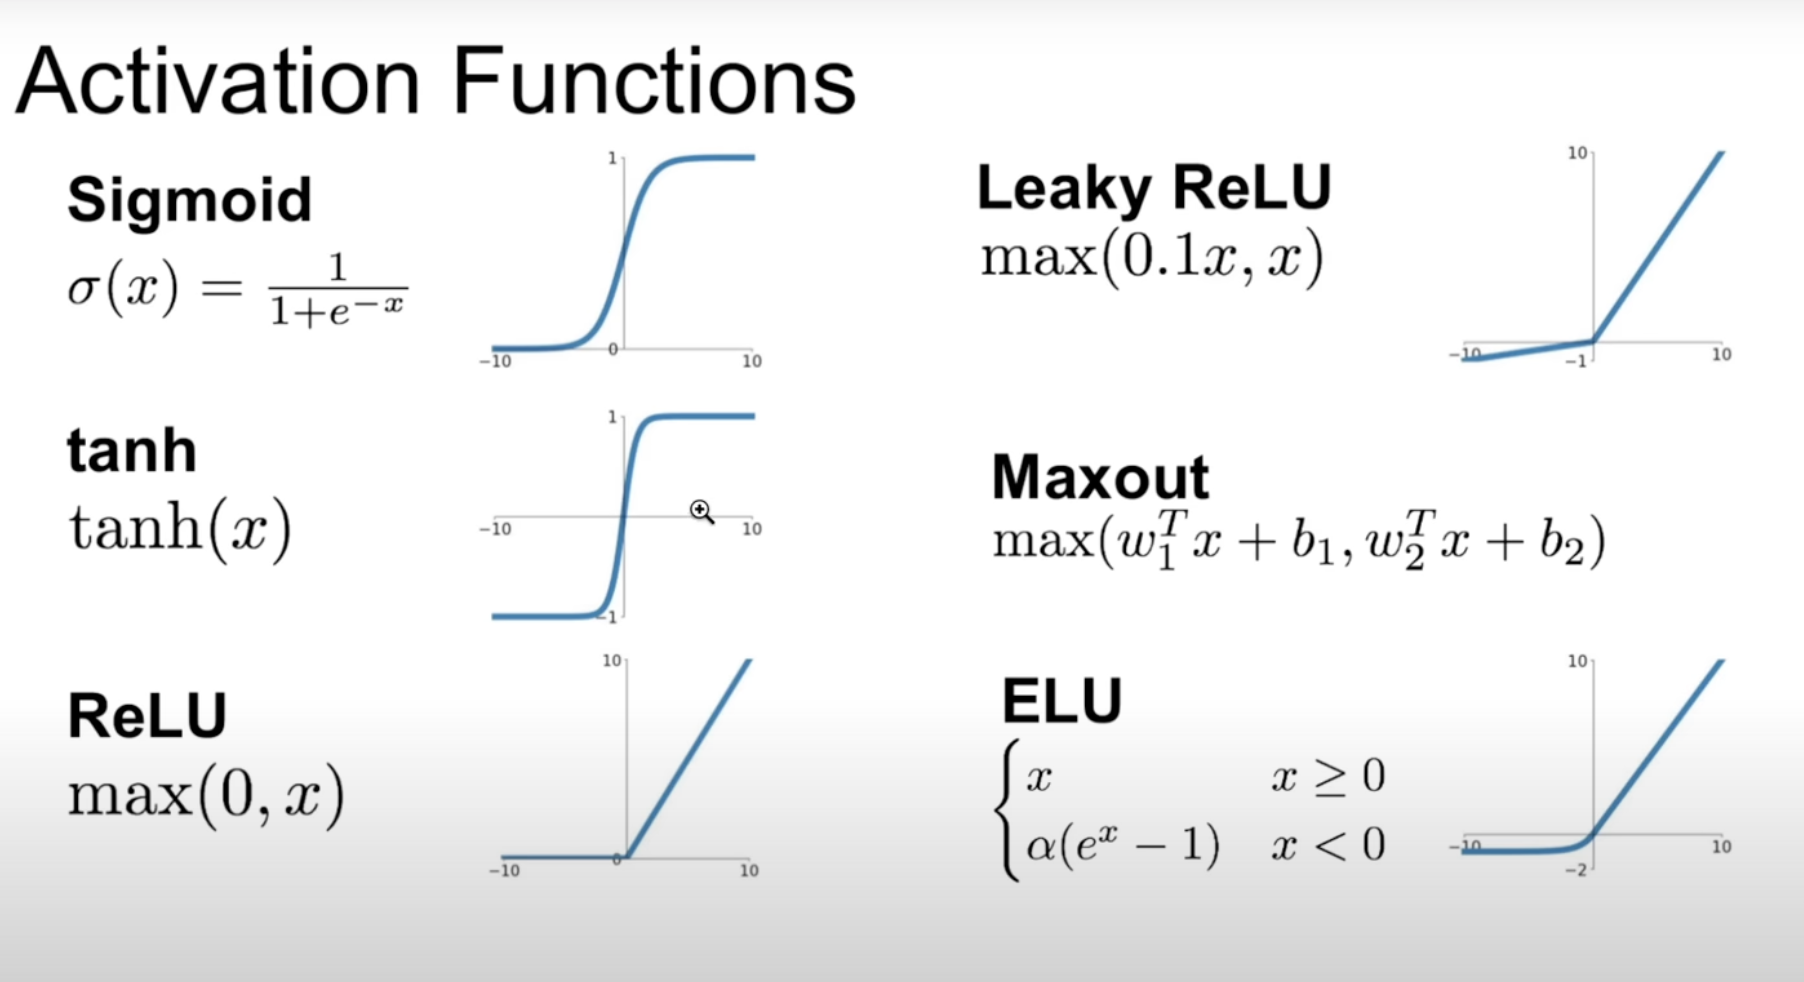

- This problem can happen at 
  - Initialization
  - Optimization - If you have too higher a learning rate, some of the neuron have too much gradient and they get knocked out of data manifold. From then on no example ever activates this neuron 
      
    _"It's like a permanent brain damage in the mind of a network"_


Solution to this problem is to have hpreact ( formed from embeddings, W1 and b1 ) closer to zero

In [207]:
tracker = {'lr':[], 'batch_sz':[], 'loss':[], 'block_sz':[], 'emb_sz':[], 'hidden_units':[] }
vocab_sz = len(i2s); vocab_sz
model_init = ModelInit(vocab_sz, emb_sz=10, hidden_units=200, mul_W2=0.01, mul_b2=0.0, mul_W1=0.1, mul_b1=0.01)
train(model_init, Xtr, Ytr, lr = 0.1, epochs=1, batch_sz=32, tracker=tracker, verbose=True)

0 tensor(3.3097, grad_fn=<NllLossBackward0>)
0 tensor(3.3097, grad_fn=<NllLossBackward0>)


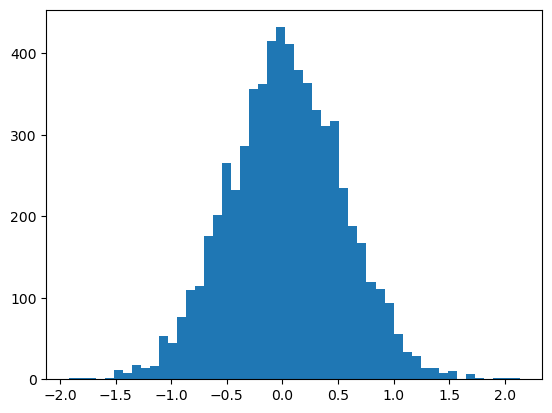

In [209]:
plt.hist(model_init.hpreact.view(-1).data, 50);

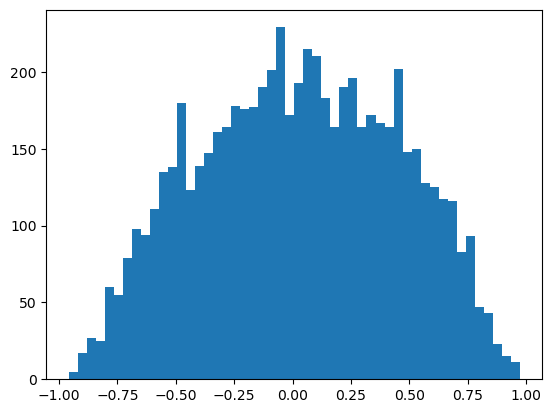

In [210]:
plt.hist(model_init.h.view(-1).data, 50);

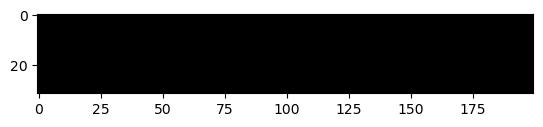

In [208]:
plt.imshow(model_init.h.data.abs() >=0.99, cmap='gray', interpolation='nearest') # All whites are true

As we expected little to no white

In [211]:
tracker = {'lr':[], 'batch_sz':[], 'loss':[], 'block_sz':[], 'emb_sz':[], 'hidden_units':[] }
vocab_sz = len(i2s); vocab_sz
model_init = ModelInit(vocab_sz, emb_sz=10, hidden_units=200, mul_W2=0.01, mul_b2=0.0, mul_W1=0.2, mul_b1=0.01)
train(model_init, Xtr, Ytr, lr = 0.1, epochs=1, batch_sz=32, tracker=tracker, verbose=True)

0 tensor(3.2982, grad_fn=<NllLossBackward0>)
0 tensor(3.2982, grad_fn=<NllLossBackward0>)


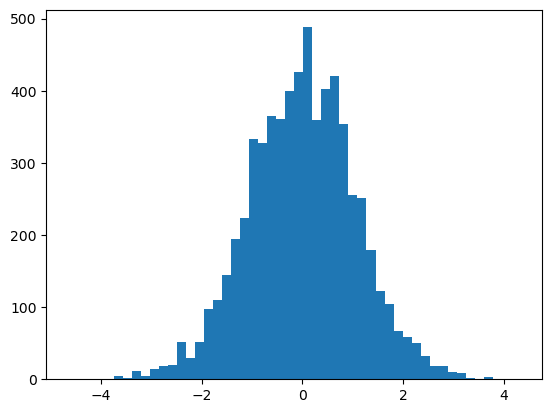

In [212]:
plt.hist(model_init.hpreact.view(-1).data, 50);

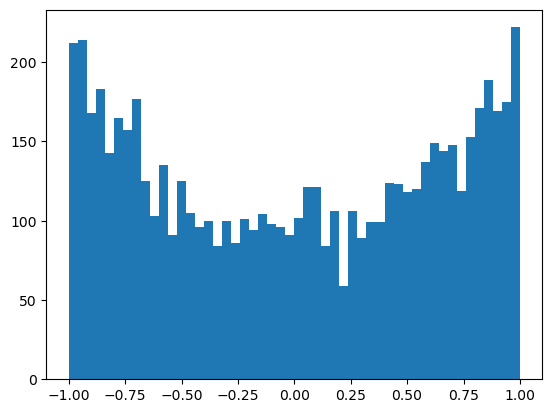

In [213]:
plt.hist(model_init.h.view(-1).data, 50);

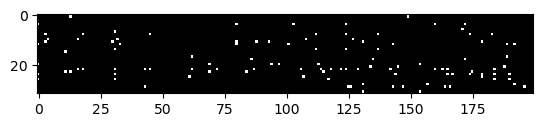

In [214]:
plt.imshow(model_init.h.data.abs() >=0.99, cmap='gray', interpolation='nearest') # All whites are true

This is nice enough. May be our multiplying constant should be around this

In [216]:
tracker = {'lr':[], 'batch_sz':[], 'loss':[], 'block_sz':[], 'emb_sz':[], 'hidden_units':[] }
vocab_sz = len(i2s); vocab_sz
model_init = ModelInit(vocab_sz, emb_sz=10, hidden_units=200, mul_W2=0.01, mul_b2=0.0, mul_W1=0.2, mul_b1=0.01)
train(model_init, Xtr, Ytr, lr = 0.1, epochs=200000, batch_sz=32, tracker=tracker, verbose=True)

0 tensor(3.2803, grad_fn=<NllLossBackward0>)
100 tensor(2.7941, grad_fn=<NllLossBackward0>)
200 tensor(2.6765, grad_fn=<NllLossBackward0>)
300 tensor(2.6213, grad_fn=<NllLossBackward0>)
400 tensor(2.3688, grad_fn=<NllLossBackward0>)
500 tensor(2.6147, grad_fn=<NllLossBackward0>)
600 tensor(2.0819, grad_fn=<NllLossBackward0>)
700 tensor(2.2611, grad_fn=<NllLossBackward0>)
800 tensor(2.4223, grad_fn=<NllLossBackward0>)
900 tensor(2.2402, grad_fn=<NllLossBackward0>)
1000 tensor(2.4718, grad_fn=<NllLossBackward0>)
1100 tensor(2.1366, grad_fn=<NllLossBackward0>)
1200 tensor(2.2823, grad_fn=<NllLossBackward0>)
1300 tensor(2.0967, grad_fn=<NllLossBackward0>)
1400 tensor(2.9293, grad_fn=<NllLossBackward0>)
1500 tensor(2.4066, grad_fn=<NllLossBackward0>)
1600 tensor(2.3438, grad_fn=<NllLossBackward0>)
1700 tensor(2.2003, grad_fn=<NllLossBackward0>)
1800 tensor(2.5877, grad_fn=<NllLossBackward0>)
1900 tensor(2.1141, grad_fn=<NllLossBackward0>)
2000 tensor(2.6357, grad_fn=<NllLossBackward0>)
2100

In [217]:
split_loss('train', model_init)
split_loss('val', model_init)

train 2.072941780090332
val 2.4288761615753174


### Activation issues (Automatically choosing initialization)

- Scaling above approach for a deeper and more complex network is challenging especially when you run into problems-diagnosing can be tedious


In [9]:
class ModelAutoInit(object):
    def __init__(self, vocab_sz, blck_sz=3, emb_sz=2, hidden_units=100, g=torch.Generator().manual_seed(2147483647), mul_W2=1.0, mul_b2=1.0, mul_W1='kaiming', mul_b1=1.0) -> None:
        if mul_W1 == 'kaiming':
            mul_W1 = (5/3)/((blck_sz*emb_sz)**0.5)
        self.C = torch.randn((vocab_sz,emb_sz), generator=g)
        self.W1 = torch.randn((blck_sz*emb_sz, hidden_units), generator=g)*mul_W1
        self.b1 = torch.randn(hidden_units, generator=g)*mul_b1
        self.W2 = torch.randn((hidden_units, vocab_sz), generator=g) * mul_W2
        self.b2 = torch.randn(vocab_sz, generator=g) * mul_b2
        self.blck_sz = blck_sz
        self.emb_sz = emb_sz
        self.hidden_units = hidden_units
        self.emb = None
        self.h = None
        self.hpreact = None
        self._init_grad()


    def _init_grad(self):
        for p in self.parameters(): p.requires_grad = True

    def __call__(self, X):
        self.emb = self.C[X]
        self.hpreact = self.emb.view(self.emb.shape[0], -1)@self.W1 + self.b1
        self.h = torch.tanh(self.hpreact)
        logits = self.h@self.W2 + self.b2 ## logits are calculated here so W2 and b2 must be close to zero
        return logits
    
    def parameters(self):
        return [self.C, self.W1, self.b1, self.W2, self.b2]

    def num_params(self):
        return sum(p.nelement() for p in self.parameters())
    
    def zero_grad(self):
        for p in self.parameters(): 
            # print(p.shape, p.data, p.grad)
            p.grad = None

(tensor(-0.0117), tensor(0.9867))

(tensor(0.0060), tensor(3.0606))

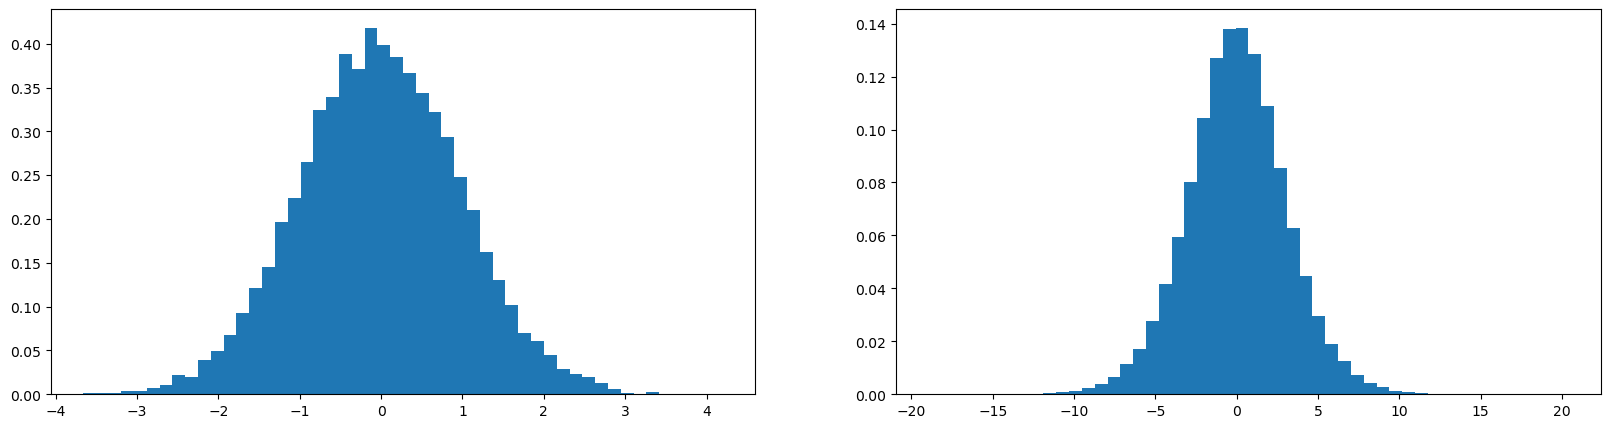

In [228]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200)
y = x@w; y
display((x.mean(), x.std()))
display((y.mean(), y.std()))
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(x.view(-1).data, 50, density=True);
plt.subplot(122)
plt.hist(y.view(-1).data, 50, density=True);

- Random input `x` drawn from gaussian, similarily random weights `w` again drawn from gaussian.
- When we look at `y` mean stays largely 0 but standard deviations expands from 1 to 3.
- We want roughly unit gaussian through out the neural net


(tensor(0.0075), tensor(0.9892))

(tensor(0.0014), tensor(0.6193))

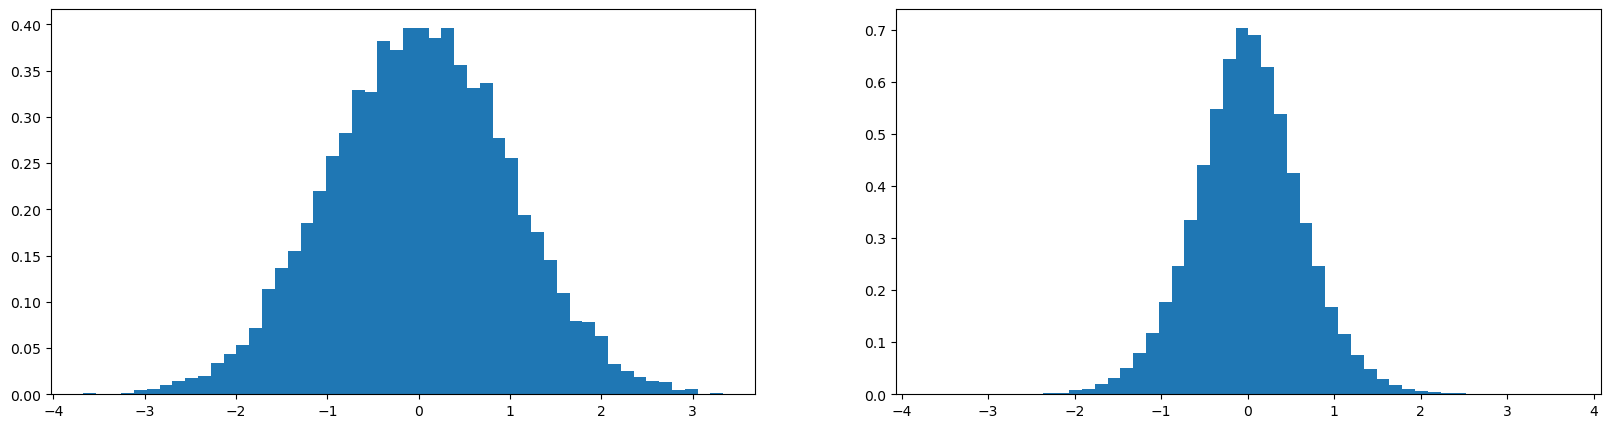

In [230]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200) *0.2
y = x@w; y
display((x.mean(), x.std()))
display((y.mean(), y.std()))
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(x.view(-1).data, 50, density=True);
plt.subplot(122)
plt.hist(y.view(-1).data, 50, density=True);

- If we multiply the weights by 5 standard deviation grows and grows. If we multiply by 0.2 std. dev shrinks. What do we multiply weights by to preserve the standard deviation
- Mathematical answer - Divide the weights by sqrt of `fann_in`. `fann_in` ; here is w.shape[0]=10. Actual formulae is 
    $$ \frac{gain}{\sqrt{fann_{in}}}

(tensor(-0.0158), tensor(0.9957))

(tensor(-0.0014), tensor(1.0008))

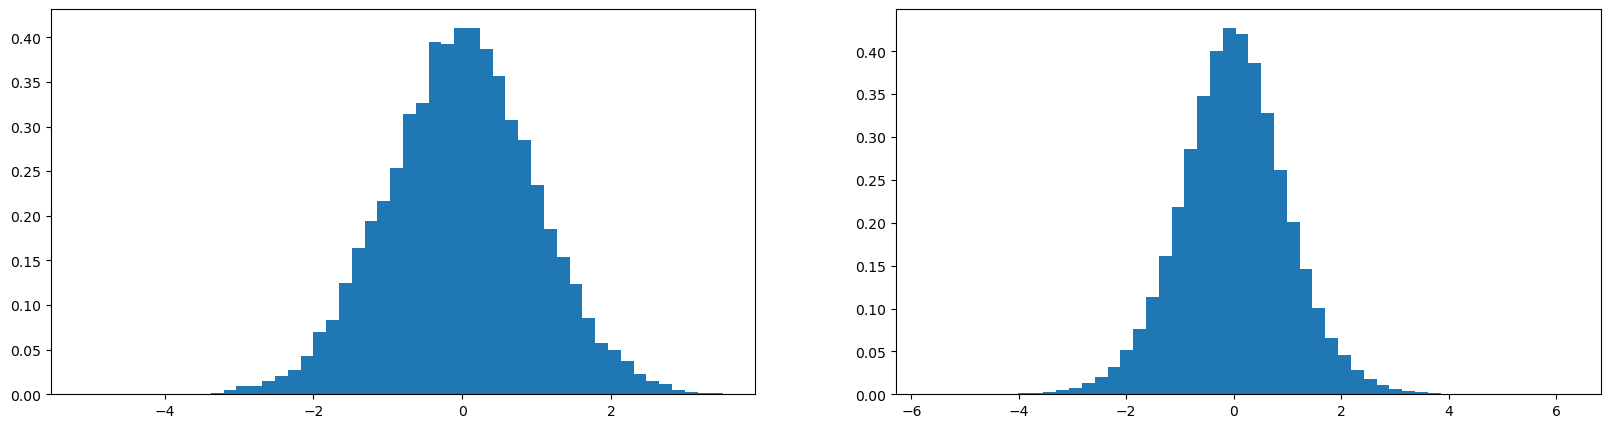

In [231]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200)/ 10**0.5
y = x@w; y
display((x.mean(), x.std()))
display((y.mean(), y.std()))
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(x.view(-1).data, 50, density=True);
plt.subplot(122)
plt.hist(y.view(-1).data, 50, density=True);

- We need activations to be well behaved and gradients to be well behaved => they don't go to infinity or shrink to zero in forward pass. Similarily backward pass also needs to be well behaved. 
- Kaiming's paper found properly initializing forward pass so that it's well behaved also ensures that the backward pass is also well behaved upto a size of hidden neuron proportional to early and late layer.
- Mode in torch - Kaiming_normal_ --> Would you like to initialize the gaussian/ weights or would you like to initialize the gradients
    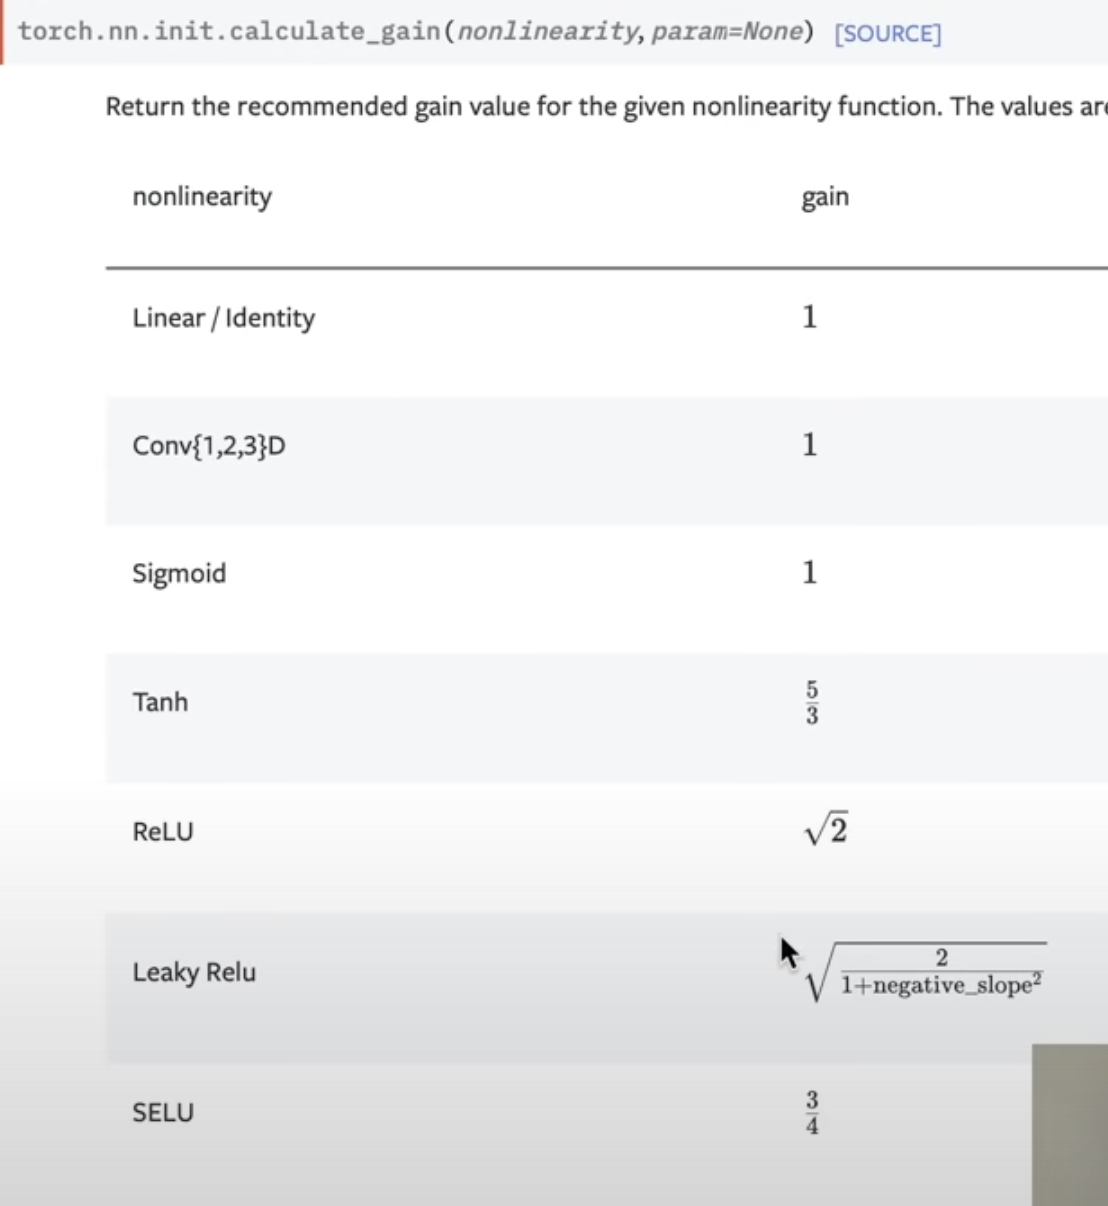

- Why is initialization not a big problem anymore?
  
  - 7 years ago u had to be very careful with activations, ranges, values and histogram, precise settings of gain and scrutinizing of non- linearities used and so on. Everything was very finnicky, fragile and needed to be properly arranged for neural network to work esp. if neural network was very deep. However there are number of modern innovations which have made everything significantly more stable and more well behaved and it has become less important to initialize these networks exactly right

  - Residual connections 
  - Use of number of normalization layers - Batch normalization, layer normalization, group normalization
  - Better optimizers => not just stochastic descent but also RMSProp and esp. Adam

In [13]:
tracker = {'lr':[], 'batch_sz':[], 'loss':[], 'block_sz':[], 'emb_sz':[], 'hidden_units':[] }
vocab_sz = len(i2s); vocab_sz
model_init = ModelAutoInit(vocab_sz, emb_sz=10, hidden_units=200, mul_W2=0.01, mul_b2=0.0, mul_W1='kaiming', mul_b1=0.01)
train(model_init, Xtr, Ytr, lr = weight_decay_scheduler(epochs=200000), epochs=200000, batch_sz=32, tracker=tracker, verbose=True)

0 tensor(3.3024, grad_fn=<NllLossBackward0>)
100 tensor(2.5187, grad_fn=<NllLossBackward0>)
200 tensor(2.8143, grad_fn=<NllLossBackward0>)
300 tensor(2.4132, grad_fn=<NllLossBackward0>)
400 tensor(2.3990, grad_fn=<NllLossBackward0>)
500 tensor(2.4342, grad_fn=<NllLossBackward0>)
600 tensor(2.4968, grad_fn=<NllLossBackward0>)
700 tensor(2.1909, grad_fn=<NllLossBackward0>)
800 tensor(2.2206, grad_fn=<NllLossBackward0>)
900 tensor(2.3197, grad_fn=<NllLossBackward0>)
1000 tensor(2.2844, grad_fn=<NllLossBackward0>)
1100 tensor(2.3681, grad_fn=<NllLossBackward0>)
1200 tensor(2.3035, grad_fn=<NllLossBackward0>)
1300 tensor(2.4185, grad_fn=<NllLossBackward0>)
1400 tensor(2.3158, grad_fn=<NllLossBackward0>)
1500 tensor(2.1326, grad_fn=<NllLossBackward0>)
1600 tensor(1.9019, grad_fn=<NllLossBackward0>)
1700 tensor(2.2801, grad_fn=<NllLossBackward0>)
1800 tensor(2.4545, grad_fn=<NllLossBackward0>)
1900 tensor(2.4646, grad_fn=<NllLossBackward0>)
2000 tensor(2.4106, grad_fn=<NllLossBackward0>)
2100

In [17]:
split_loss('train', model_init)
split_loss('val', model_init)

train 1.991290807723999
val 2.3239383697509766


### Batch Normalization


- Enabled to train very deep NN reliably
- It just works
- Motivations
  
  - We don't want the pre-activation or `model.hpreact` layers to be too small because then the tanh is not doing anything
  - We don't want them to be too large because then tanh is saturated.
  - We want them to be roughly gaussian - zero mean, 1 std. dev. atleast during initialization
  - Insight from BN paper is => 
    
    _" You want your hidden states to be roughly gaussian, then why not just take the hidden states and just normalize them to be gaussian"_

  - We can standardize hidden states because - Standardization is a perfectly differentiable operation
  - We want `model.hpreact` to be roughly gaussian but only at initialization. We don't want it to be gaussian always
  - We like the distribution of neuron at hpreact to move around to become sharp/ squeezed, trigger happy more or less. And we want back propogation to tell us how the distribution should move around. So inaddition to normalization of neuron we also have to introduce scale and shift weights in BN. We are basically looking at standardized gains and offseting them by some gain and adding some bias
  - With BN layer following a particular layer. We don't need bias for those layers ( esp. conv and linear). Bias weights have no impact as they are removed during normalization. Our bias in bn layer can play the role of bias.
  - Since `bngain` and `bnbias` are initialized to 1 and 0 respectively. The hpreact_bn will get normalized gaussian. During backpropogation we can change bngain and bnbias so that network have full ability to do what it wants
  - With deeper networks, it becomes extremely finnicky to maintain and do proper weight initialization at different layers. Instead we can sprinkle many batch normalization at will.
  - It's common to sprinkle batch normalization layers just after convolutions ( simply a multiplication with weight matrix but with a more structured format) and linear layers to control the state of activation at every point in the neural net.
      - Helps us control activations through out the NN
      - Doesn't require us to do perfect mathematics and care about the activations distributions, for all different types of lego building blocks you might want to integrate with the NN.
      - Significantly stablizes the training

  - Cons of BN
     - Stability offered by BN layers comes at a terrible cost. Due to the way BN is normalizing , we are coupling examples mathematically in forward pass and backward pass. `hpreact` and `logits` are not just an example of it's on inputs but also a function of other examples that just happen to come for a ride in that batch.
     - `hpreact` is going to change slightly depending on what other examples are there in the batch. Depending on how you sample `hpreact` is going to change subtley or jitter; same is the case for the `logits`. This may feel like a bug or undesirable -> but in practice turns out to be good for the training as a side effect. We can think of this as a kind of regularization. It's padding out anyone of these stupid examples and is introducing a bit of entropy. Because of padding out, it's actually a form of data augmentation. This makes is harder for the neural net to overfit.
     - Deceivingly as a second order effect, BN is a regularizer.
     - No one likes this property attempts to remove it - group normalization, instance normalization , layer normalization.
  

In [64]:
class ModelAutoInitBN(object):
    def __init__(self, vocab_sz, blck_sz=3, emb_sz=2, hidden_units=100, g=torch.Generator().manual_seed(2147483647), 
                 mul_W2='kaiming', mul_b2=1.0, mul_W1='kaiming', mul_b1=1.0, 
                 eps=10**-5, momentum = 0.01, training=True) -> None:
        
        if mul_W1 == 'kaiming': mul_W1 = (5/3)/((blck_sz*emb_sz)**0.5) ## For tanh
        if mul_W2 == 'kaiming': mul_W2 = 1/((hidden_units)**0.5) ## For linear layer
    
        self.C = torch.randn((vocab_sz,emb_sz), generator=g)
        self.W1 = torch.randn((blck_sz*emb_sz, hidden_units), generator=g)*mul_W1
        # self.b1 = torch.randn(hidden_units, generator=g)*mul_b1
        self.W2 = torch.randn((hidden_units, vocab_sz), generator=g) * mul_W2
        self.b2 = torch.randn(vocab_sz, generator=g) * mul_b2
        self.bngain = torch.ones((1, hidden_units))
        self.bnbias = torch.zeros((1, hidden_units))
        self.blck_sz = blck_sz
        self.emb_sz = emb_sz
        self.hidden_units = hidden_units
        self.emb = None
        self.h = None
        self.hpreact = None
        self.eps = eps
        self.momentum = momentum
        self.training = training
        self.hpreact_mean = None
        self.hpreact_var = None
        self._init_grad()


    def _init_grad(self):
        for p in self.parameters(): p.requires_grad = True

    def __call__(self, X):
        self.emb = self.C[X]
        self.hpreact = self.emb.view(self.emb.shape[0], -1)@self.W1  # + self.b1
        if self.training:
            self.hpreact_mean = self.hpreact.mean(dim=0, keepdim=True)
            self.hpreact_var = self.hpreact.var(dim=0, keepdim=True)
        self.hpreact_bn = self.bngain*((self.hpreact - self.hpreact_mean)/ (self.hpreact_var + self.eps)**0.5) + self.bnbias
        self.h = torch.tanh(self.hpreact_bn)
        logits = self.h@self.W2 + self.b2 ## logits are calculated here so W2 and b2 must be close to zero
        return logits
    
    def parameters(self):
        return [self.C, self.W1, self.W2, self.b2, self.bnbias, self.bngain] # remove  self.b1

    def num_params(self):
        return sum(p.nelement() for p in self.parameters())
    
    def zero_grad(self):
        for p in self.parameters(): 
            # print(p.shape, p.data, p.grad)
            p.grad = None

In [65]:
def train(model, X, Y, lr=0.1, epochs=1000, verbose=False, batch_sz=None, loss_fn=F.cross_entropy, tracker = None):
    

    for i in range(epochs):
    
        #minibatch construct
        inputs = X
        target = Y
        if batch_sz:
            ix = torch.randint(low=0, high=X.shape[0], size=(batch_sz,))
            inputs = X[ix]
            target = Y[ix]
        
        # Forward Pass
        logits = model(inputs); logits.shape 
        # loss = nll(logits, Y)
        loss = loss_fn(logits, target)
        # loss2 = nll(logits, Y)

        # Backward Pass
        model.zero_grad()
        loss.backward(); 
        if i%100 == 0 and verbose: print(i, loss)
        if i == epochs-1: print(i, loss)


        ## Update / Gradient
        lri = next(lr).item() if hasattr(lr, "__next__") else lr
        for p in model.parameters():
            p.data -=lri*p.grad

        if tracker is not None:
            tracker.get('lr', []).append(lri)
            tracker.get('loss', []).append(loss.item())
            tracker.get('batch_sz', []).append(batch_sz)
            tracker.get('block_sz', []).append(X.shape[1])
            tracker.get('emb_sz', []).append(model.C.shape[1])
            tracker.get('hidden_units', []).append(model.hidden_units)
    return model

In [66]:
tracker = {'lr':[], 'batch_sz':[], 'loss':[], 'block_sz':[], 'emb_sz':[], 'hidden_units':[] }
vocab_sz = len(i2s); vocab_sz
model_init = ModelAutoInitBN(vocab_sz, emb_sz=10, hidden_units=200, mul_W2='kaiming', mul_b2=0.0, mul_W1='kaiming', mul_b1=0.01)
train(model_init, Xtr, Ytr, lr = weight_decay_scheduler(epochs=100000), epochs=100000, batch_sz=32, tracker=tracker, verbose=True)

0 tensor(3.4678, grad_fn=<NllLossBackward0>)
100 tensor(2.7834, grad_fn=<NllLossBackward0>)
200 tensor(2.4547, grad_fn=<NllLossBackward0>)
300 tensor(2.7189, grad_fn=<NllLossBackward0>)
400 tensor(2.6705, grad_fn=<NllLossBackward0>)
500 tensor(2.3696, grad_fn=<NllLossBackward0>)
600 tensor(2.5320, grad_fn=<NllLossBackward0>)
700 tensor(2.4482, grad_fn=<NllLossBackward0>)
800 tensor(2.1285, grad_fn=<NllLossBackward0>)
900 tensor(2.1645, grad_fn=<NllLossBackward0>)
1000 tensor(2.2621, grad_fn=<NllLossBackward0>)
1100 tensor(2.3032, grad_fn=<NllLossBackward0>)
1200 tensor(2.3277, grad_fn=<NllLossBackward0>)
1300 tensor(2.0905, grad_fn=<NllLossBackward0>)
1400 tensor(1.9403, grad_fn=<NllLossBackward0>)
1500 tensor(2.2550, grad_fn=<NllLossBackward0>)
1600 tensor(2.6272, grad_fn=<NllLossBackward0>)
1700 tensor(2.3444, grad_fn=<NllLossBackward0>)
1800 tensor(2.2626, grad_fn=<NllLossBackward0>)
1900 tensor(2.6527, grad_fn=<NllLossBackward0>)
2000 tensor(2.5426, grad_fn=<NllLossBackward0>)
2100

In [57]:
model_init.hpreact.mean(dim=0, keepdim=True).shape, model_init.hpreact.shape

(torch.Size([1, 200]), torch.Size([32, 200]))

In [63]:
split_loss('train', model_init)
split_loss('val', model_init)

train 2.050381660461426
val 2.344590187072754


### Calibration of BN for inference

Proposal - Set mean and std. dev of BN layer single time over the training set before inference after the training

In [ ]:
def calibrate_bn_inference(model, Xtr):
    model.training = False
    with torch.no_grad():
        emb = model.C[Xtr]
        hpreact = emb.view(emb.shape[0], -1)@model.W1  # + self.b1
        model.hpreact_mean = hpreact.mean(dim=0, keepdim=True)  # storing this variable in model helps us modify them 
        model.hpreact_var = hpreact.var(dim=0, keepdim=True)
    return model

In [22]:
#| hide
import nbdev; nbdev.nbdev_export()